# CLUSTERING PRACTICAL

## ARTIN

## Mathieu Lagrange

reports are to be sent to [mathieu dot lagrange at ec-nantes dot fr] no later than a week after the lab

## Import tools

please import others if needed

In [22]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import make_blobs

## Data: generate a synthetic dataset

Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping
clusters.

In [23]:
centers = [(-4, -4), (4, 4), (-3,3), (2, -3)]
cluster_std = [0.8, 1, 0.7, 0.7]

X, true_label = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

Display the set with one color per cluster using the scatter function from matplotlib.pyplot

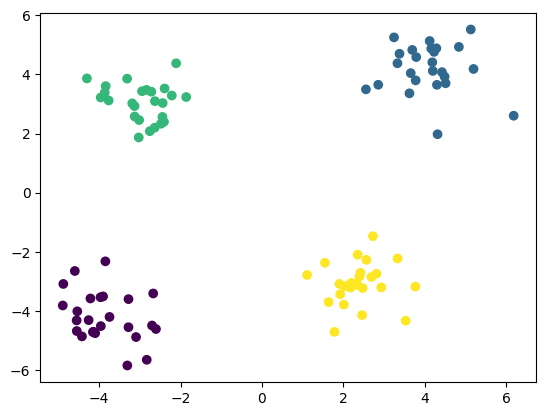

In [24]:
plt.scatter(X[:, 0],X[:, 1], c = true_label)

## Baseline: the random clustering algorithm

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to each point.

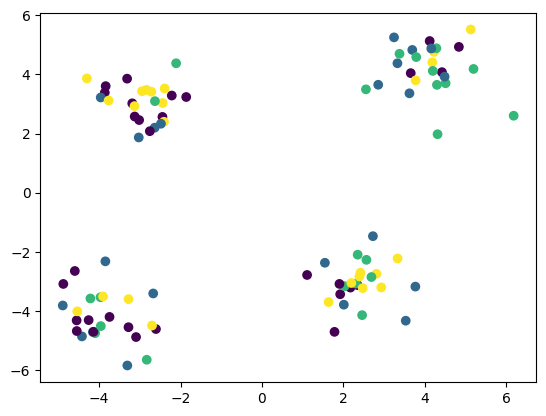

In [25]:
k = 4
random_predicted_cluster_labels = np.random.randint(0, k, size=len(X))

plt.scatter(X[:, 0], X[:, 1], c = random_predicted_cluster_labels)

## Metric: the rand index

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for reference)

In [26]:
predicted = random_predicted_cluster_labels
ground_truth = true_label

def rand_index(predicted, ground_truth):
    a = 0
    b = 0
    
    n = len(ground_truth)
    
    pairs = []

    for i in range (0, n-1):
        for j in range(0, n-1):
            possible_pair = [i,j]
            conjugate = [j,i]
            if possible_pair not in pairs and conjugate not in pairs:
                pairs.append(possible_pair)
    pairs = np.array(pairs)
    
    for pair in pairs:

        if (predicted[pair[0]] == predicted[pair[1]]) and (ground_truth[pair[0]] == ground_truth[pair[1]]):
            a += 1
        if (ground_truth[pair[0]] != ground_truth[pair[1]]) and (predicted[pair[0]] != predicted [pair[1]]):
            b += 1
            
    num = a + b
    den = n*(n-1)*0.5
    num/den
    return  num/den

print(rand_index(predicted, ground_truth))

0.6432323232323233


Compute the rand index between the reference clustering and 100 runs of the baseline algorithm.

In [35]:
rand_index_list = []
iterations = []
i = 0

for i in range(100):
    predicted = np.random.randint(0, 3, 100)
    rand_index_list.append(rand_index(predicted, ground_truth))
    iterations.append(i)


Display results and compute the mean and standard deviation.

Mean =  0.595589898989899
Std Deviation =  0.007848221203793054


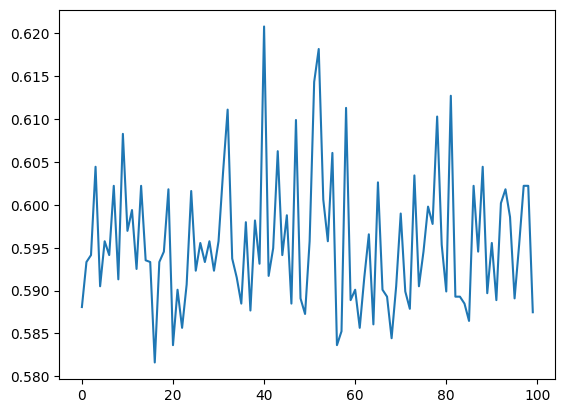

In [28]:
plt.figure()
plt.plot(iterations, rand_index_list)
plt.show

mean = sum(rand_index_list)/len(rand_index_list)
std = np.std(rand_index_list)

print("Mean = ", mean)
print("Std Deviation = ", std)

## Hierarchical Clustering

Compute the euclidean distance matrix using the pdist function from scipy.spatial.distance

In [29]:
from scipy.spatial.distance import pdist

euclidean_distance = pdist(X)


Display and interpret its shape

In [30]:
print(euclidean_distance)
euclidean_distance.shape

[ 6.50353607  7.28005137  7.54771088 ...  6.34839146 11.52145967
  6.68456285]


(4950,)

We have n*(n-1)/2 rows which means we calculate all the distances of the unique pair of points. The diagonal is 0 because there is no distance between the same point. And also the matrix is symmetric

Compute the single link hierarchical clustering using the linkage function from scipy.cluster.hierarchy.

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkaged_cluster = linkage(X, metric = 'euclidean')

Display the corresponding dendrogram using the dendrogram function from scipy.cluster.hierarchy.

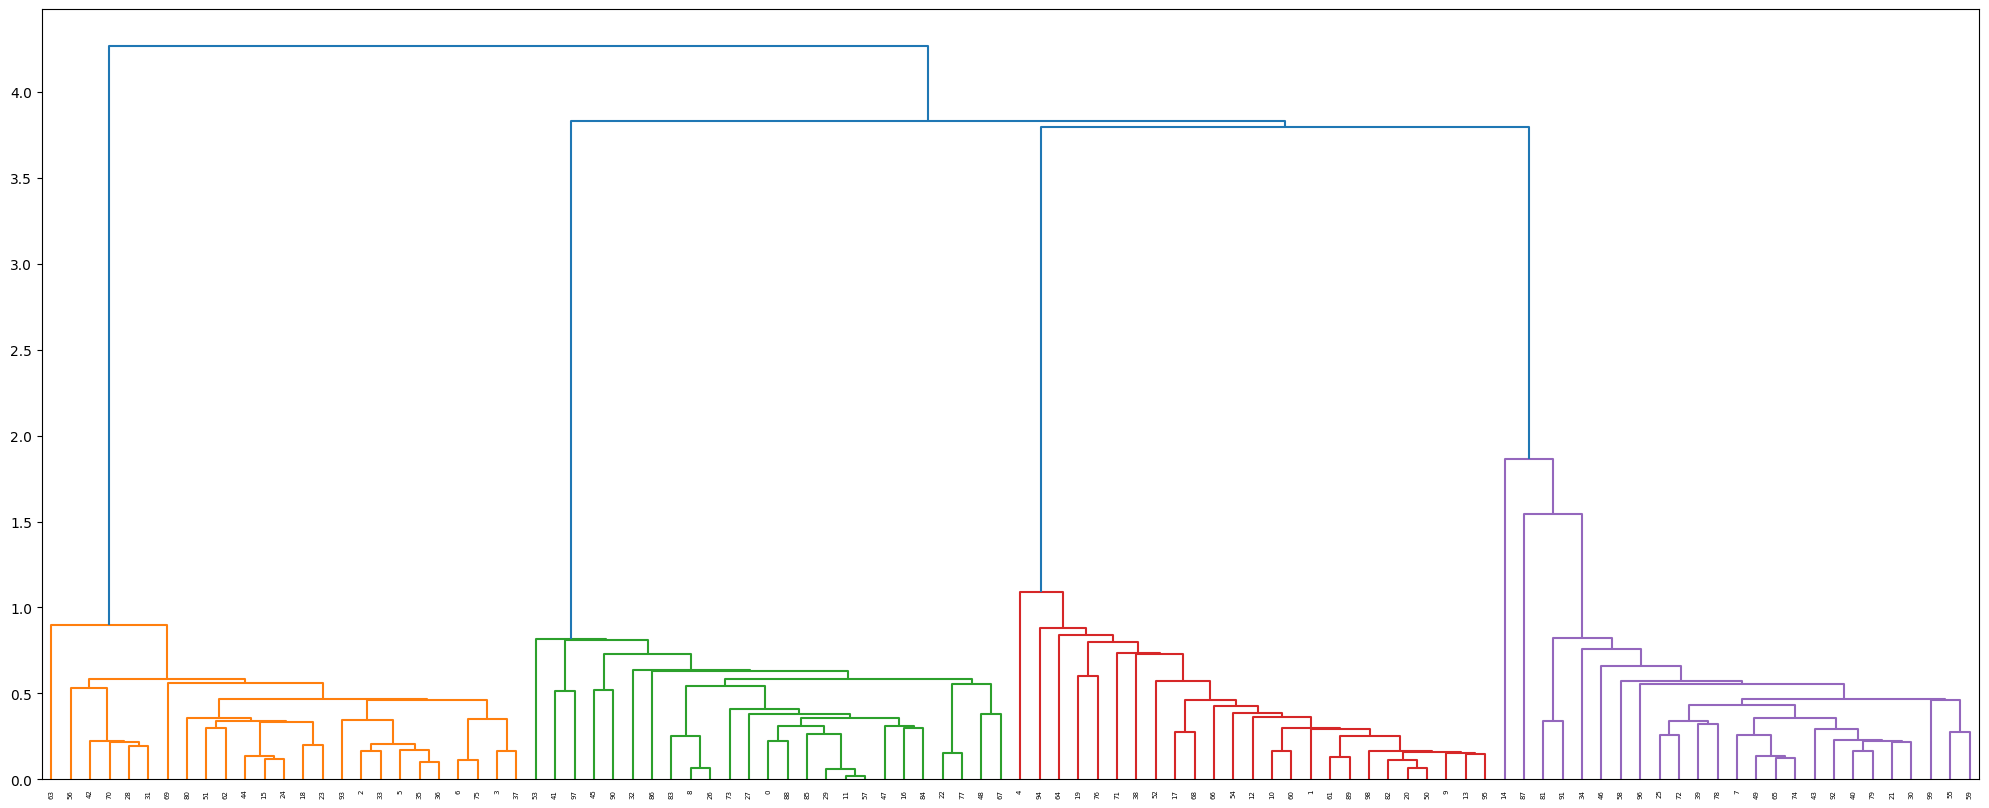

In [32]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkaged_cluster)
plt.show()

Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters using the fcluster function from scipy.cluster.hierarchy.

In [34]:
from scipy.cluster.hierarchy import ward, fcluster

fcluster_cluster = fcluster(linkaged_cluster, t=4, criterion='maxclust')

print(fcluster_cluster)

[1 2 0 0 2 0 0 3 1 2 2 1 2 2 3 0 1 2 0 2 2 3 1 0 0 3 1 1 0 1 3 0 1 0 3 0 0
 0 2 3 3 1 0 3 0 1 3 1 1 3 2 0 2 1 2 3 0 1 3 3 2 2 0 0 2 3 2 1 2 0 0 2 3 1
 3 0 2 1 3 3 0 3 2 1 1 1 1 3 1 2 1 3 3 0 2 2 3 1 2 3]


Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

Display results and compute the mean and standard deviation.

Explain why the standard deviation is 0.

answer here

## Partitional Clustering

Implement the k-means algorithm (see https://en.wikipedia.org/wiki/K-means_clustering section Standard algorithm for reference).

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance of the points to the centroids.

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

Display results and compute the mean and standard deviation.

## Performance Analysis

Display the performance of the 3 clustering algorithms on the synthetic dataset using the bar function from matplotlib.pyplot.

Load the iris dataset using the load_iris function from scikit-learn and perform the same performance analysis using this dataset.

Load the Breast cancer wisconsin (diagnostic) dataset dataset using the load_breast_cancer function from scikit-learn and perform the same performance analysis using this dataset.

## [Bonus] Determining the number of clusters

Implement the gap statistic method for determining the optimal number of clusters for the 3 datasets.


Discuss the results.

answer here.